## Интеллектуальный анализ данных – весна 2022
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


In [42]:
X.shape

(178, 13)

**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [43]:
X_raw = X                           # Для удобства обозначения

In [44]:
X_raw.isnull().any().any()          # Получаем, что пропущенных значений нет

False

In [45]:
(X_raw.dtypes == "object").sum()    # Получаем, что категориальных переменных нет

0

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
# np.random.seed(0)

In [48]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(124, 13) (54, 13) (124,) (54,)


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [49]:
# классификатор
from sklearn.neighbors import KNeighborsClassifier
# scaler
from sklearn import preprocessing

In [50]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
22,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0
108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
145,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0


In [51]:
# Масштабируем признаки
standartizer = preprocessing.StandardScaler()
standartizer.fit(X_train)

X_train_scaled = standartizer.transform(X_train)
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=X_train.columns, index=X_train.index)

X_test_scaled = standartizer.transform(X_test)
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=X_test.columns, index=X_test.index)

In [52]:
X_train_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
22,0.910831,-0.462599,-0.011426,-0.820679,0.062417,0.588204,0.935654,-0.761914,0.130072,-0.512387,0.657066,1.943545,0.937010
108,-0.956099,-0.966087,-1.537254,-0.147487,-0.554019,0.169986,0.072432,0.207913,0.784626,-0.982107,-0.408595,0.581180,-1.413367
175,0.359522,1.675016,-0.374718,0.133010,1.363782,-1.118128,-1.314889,0.531189,-0.440566,2.220529,-1.559509,-1.448466,0.286837
145,0.221695,1.047864,-0.774340,0.413506,0.130910,-1.268687,-1.458759,0.531189,-0.524483,-0.426984,-1.516883,-1.281645,0.270582
71,1.098777,-0.771758,1.114780,1.535493,-0.964977,1.156982,0.915101,-1.246827,0.432174,-0.691735,1.722727,0.775804,-1.094782


In [53]:
neighbors_list = [1, 3, 5, 10, 15, 25]
print("%5s %10s %10s" % ("NN", "Train", "Test"))
classifiers = []

for n in neighbors_list:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean")
    clf.fit(X_train_scaled[["alcohol", "magnesium"]], y_train)
    classifiers.append(clf)
    
    y_predicted_train = clf.predict(X_train_scaled[["alcohol", "magnesium"]])
    y_predicted_test  = clf.predict(X_test_scaled [["alcohol", "magnesium"]])
    
    print("%5d %10f %10f" % (n, np.mean(y_predicted_train == y_train), np.mean(y_predicted_test == y_test)))

   NN      Train       Test
    1   1.000000   0.666667
    3   0.806452   0.777778
    5   0.750000   0.722222
   10   0.733871   0.777778
   15   0.733871   0.796296
   25   0.669355   0.796296



### ПРИМЕР ВЫВОДА ###
NN 	 Train 	 Test
1 	 1.0 	 0.56
3 	 0.83 	 0.61
5 	 0.81 	 0.63
10 	 0.79 	 0.54
15 	 0.74 	 0.57
25 	 0.76 	 0.56



**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [54]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

- *Использовались библиотеки из приложенной* [документации](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/):

In [55]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

In [56]:
np.unique(y_train)

array([0, 1, 2])

- *Использовались библиотеки из приложенной* [документации](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/):

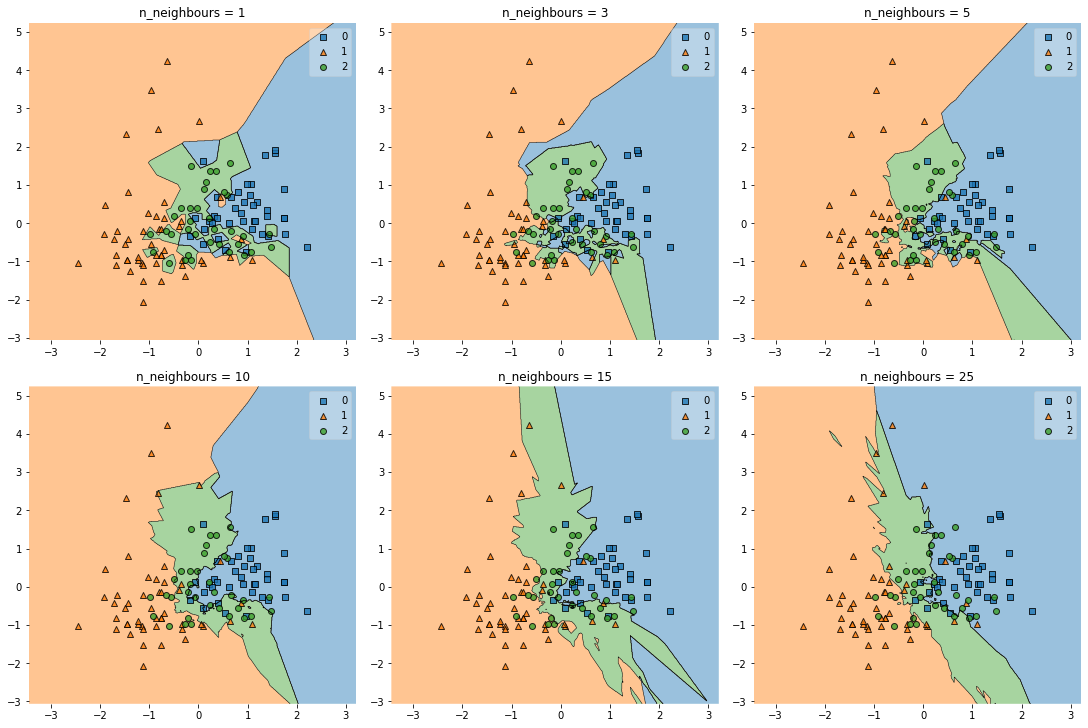

In [57]:
figure = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = gridspec.GridSpec(ncols=3, nrows=2, figure=figure)


for clf, grd, n_nbr in zip(classifiers, itertools.product([0, 1], [0, 1, 2]), neighbors_list):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_scaled[["alcohol", "magnesium"]].values, y=y_train, clf=clf)
    plt.title("n_neighbours = " + str(n_nbr))

plt.show()

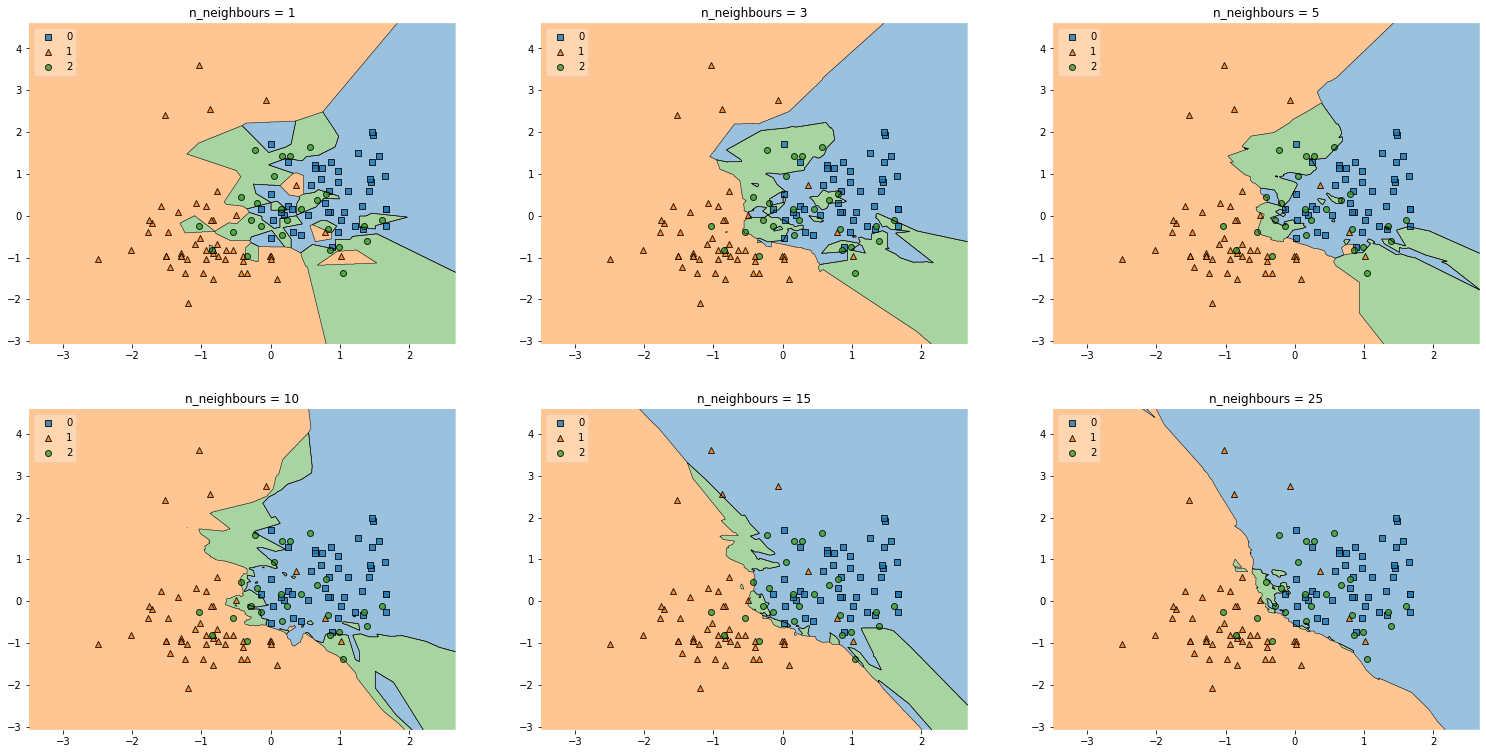

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

- Итак, мы сравнили эффективность метода k ближайших соседей для различного числа соседей. На *обучающей* выборке лучший результат показывает k=1, так как каждый "новый" объект уже известен модели. В то же время на результат не влияют выбросы, и accuracy -> 1.
Графики показывают, что при увеличении числа соседей решающие области становятся более "грубыми", приблизительными, давая неправильные показания на *обучающей* выборке.

- На *тестовой* же выборке классификаторы с бОльшим числом соседей показывают лучший результат. Однако оно также не должно быть слишком большим (что уменьшит количество верных ответов) и должно определяться по нескольким выборкам (с использованием дополнительных данных)

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

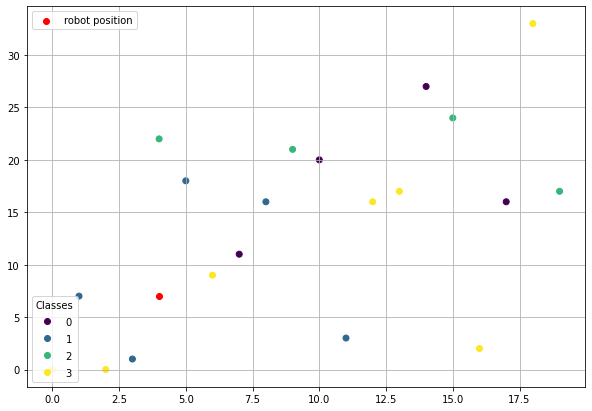

In [58]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
a = np.array([[0, 1],
            [2, 3]])

a = np.append(a, [[4, 5]], axis=0)
a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [117]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = initial_position.reshape(1, -1)
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
        self.knn.fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        current_position = self.trajectory[-1]
        # if np.random.randint(0, 10) < 8:       # Другой способ
        
        if np.random.binomial(1, 0.8, 1)[0]:
            new_position = current_position + self.mapping.get(self.knn.predict(current_position.reshape(1, -1))[0])
        else:
            new_position = current_position + self.mapping.get(0)
        self.trajectory = np.append(self.trajectory, new_position.reshape(1, -1), axis=0)

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [131]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20]),
                       figsize = (10, 8)) -> float:
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = figsize)
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()
    
    efficiency = np.shape(np.unique(traj, axis=0))[0] / (n_movements + 1)
    
    return efficiency

0.8627450980392157

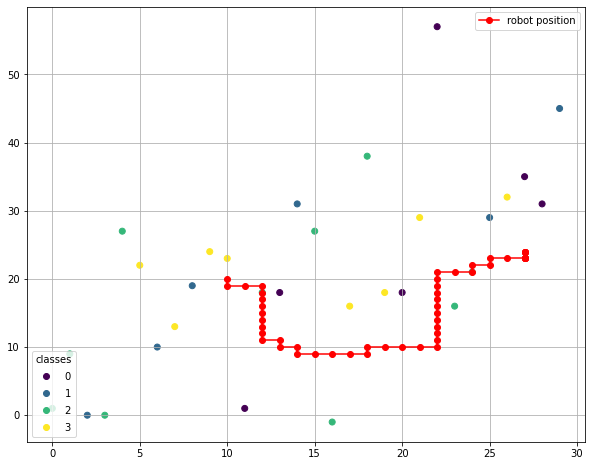

In [132]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

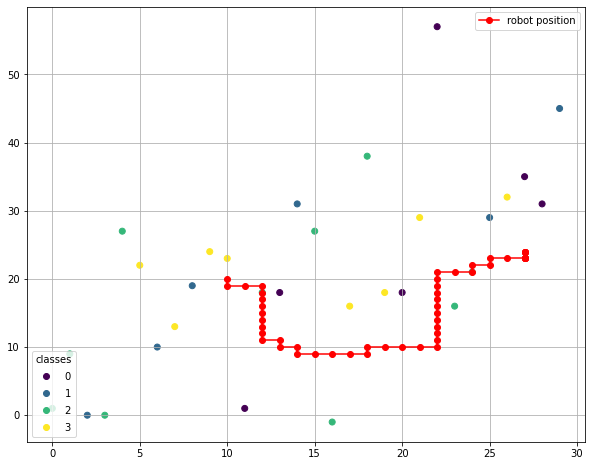

In [24]:
# Example

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

0.8235294117647058

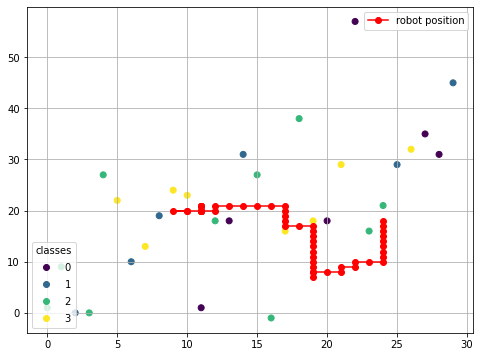

In [133]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50, figsize = (8, 6))

0.8627450980392157

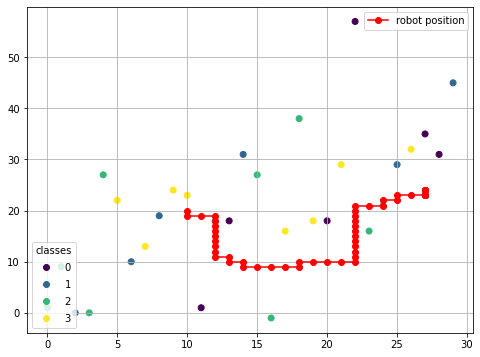

In [134]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50, figsize = (8, 6))

0.7843137254901961

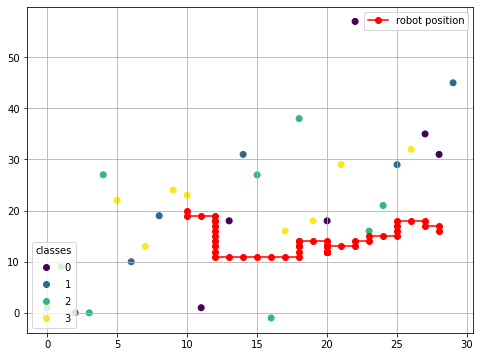

In [135]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50, figsize = (8, 6))

0.49019607843137253

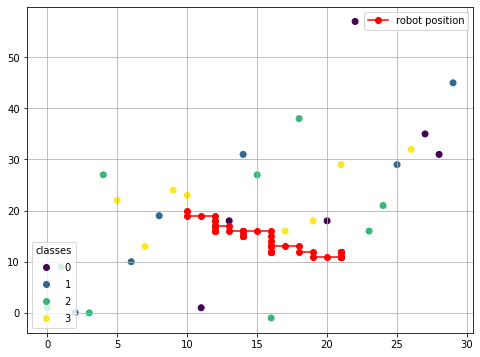

In [136]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 20, n_movements = 50, figsize = (8, 6))

Для оценки движения робота можно измерять его эффективность, то есть *отношение количества уникальных позиций к общему числу ходов*. Это позволяет понять, как часто робот был не уверен и посещал уже посещённые вершины (и даже зацикливался). В данном случае худший результат мы получаем для большого числа соседей (`k=20`). Лучший результат достигается при `k=5` (но его  нельзя считать объективно лучшим, потому что вмешивается random и у нас нет цели эффективно обойти поле). 

Хотя в некоторых случаях (например, при `seed = 0`) получается так, что определённых классов на плоскости больше. Тогда при больших `k=20` робот становится практически неуправляемым и движется либо вправо (благодаря случайности), либо вниз (из-за преобладания жёлтых меток), что приводит к отсутствию зацикливаний.

Если бы классы назначались меткам осмысленно, можно было бы полноценно управлять поведением робота, ограничивая область его передвижения. 

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [2]:
import seaborn as sns
data = pd.read_csv('archive/diamonds.csv')
rates = dict()
print(data.shape)
data.head(10)

(53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

In [3]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [6]:
data.isnull().any().any()  # Пропущенных значений нет

False

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [7]:
data = data.drop(columns=["Unnamed: 0"])  # Удаление неинформативного столбца  
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

- Вещественных признаков:
    - `carat`, `depth`, `table`, `x`, `y`, `z`

In [8]:
col = data.corr().loc["price"].values
correlation = pd.DataFrame(data=col.reshape(1, -1), columns=[["carat", "depth", "table", "price", "x", "y", "z"]], index=["price"])
correlation

,carat,depth,table,price,x,y,z
price,0.921591,-0.010647,0.127134,1.0,0.884435,0.865421,0.861249


<AxesSubplot:>

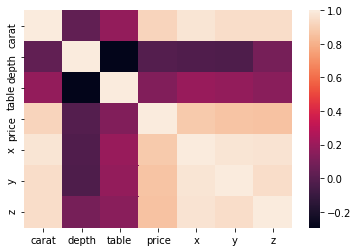

In [9]:
sns.heatmap(data=data.corr())

Наибольшее влияние на *prices* оказывают *carat*, *x*, *y*, *z*

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [10]:
print(data.shape)
data.head(10)

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [11]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [12]:
data = pd.get_dummies(data=data, columns=["cut", "color", "clarity"], drop_first=True)
data

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
y = data["price"]
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [15]:
X = data.drop("price", axis=1)
X

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37758, 23) (16182, 23) (37758,) (16182,)


**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
real_features_mask = (X_train.dtypes == "float64").values

In [19]:
X_train

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
16259,1.01,62.0,57.0,6.44,6.36,3.97,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
24005,1.54,62.6,56.0,7.42,7.35,4.62,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
12211,1.15,63.1,63.0,6.63,6.53,4.15,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
37918,0.41,60.6,57.0,4.79,4.84,2.92,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
181,0.54,61.5,57.0,5.24,5.26,3.23,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,0.52,60.7,59.0,5.18,5.14,3.13,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
52416,0.70,63.6,60.0,5.59,5.51,3.51,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
42613,0.32,61.3,58.0,4.35,4.39,2.68,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
43567,0.41,61.0,57.0,4.81,4.79,2.93,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [20]:
standartizer = StandardScaler()

real_values = X_train[X_train.columns[real_features_mask]]

standartizer.fit(real_values)
real_values_scaled = pd.DataFrame(data=standartizer.transform(real_values), 
                                   columns=X_train.columns[real_features_mask], index=X_train.index)

In [21]:
real_values_scaled

,carat,depth,table,x,y,z
16259,0.445813,0.170523,-0.201734,0.630510,0.540663,0.605461
24005,1.562356,0.588814,-0.649638,1.503049,1.397771,1.519486
12211,0.740749,0.937389,2.485693,0.799676,0.687843,0.858576
37918,-0.818197,-0.805489,-0.201734,-0.838559,-0.775299,-0.871040
181,-0.544328,-0.178053,-0.201734,-0.437904,-0.411678,-0.435121
...,...,...,...,...,...,...
45891,-0.586462,-0.735774,0.694075,-0.491325,-0.515570,-0.575740
52416,-0.207259,1.285965,1.141980,-0.126283,-0.195237,-0.041387
42613,-1.007799,-0.317483,0.246171,-1.230311,-1.164894,-1.208526
43567,-0.818197,-0.526628,-0.201734,-0.820753,-0.818588,-0.856978


In [22]:
X_train_scaled = pd.concat([real_values_scaled, X_train[X_train.columns[~real_features_mask]]], axis=1)

In [23]:
real_features_mask = (X_test.dtypes == "float64").values

real_values_scaled = pd.DataFrame(data=standartizer.transform(X_test[X_test.columns[real_features_mask]]), 
                                   columns=X_test.columns[real_features_mask], index=X_test.index)

X_test_scaled = pd.concat([real_values_scaled, X_test[X_test.columns[~real_features_mask]]], axis=1)

In [24]:
X_train_scaled

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
16259,0.445813,0.170523,-0.201734,0.630510,0.540663,0.605461,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
24005,1.562356,0.588814,-0.649638,1.503049,1.397771,1.519486,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
12211,0.740749,0.937389,2.485693,0.799676,0.687843,0.858576,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
37918,-0.818197,-0.805489,-0.201734,-0.838559,-0.775299,-0.871040,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
181,-0.544328,-0.178053,-0.201734,-0.437904,-0.411678,-0.435121,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,-0.586462,-0.735774,0.694075,-0.491325,-0.515570,-0.575740,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
52416,-0.207259,1.285965,1.141980,-0.126283,-0.195237,-0.041387,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
42613,-1.007799,-0.317483,0.246171,-1.230311,-1.164894,-1.208526,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
43567,-0.818197,-0.526628,-0.201734,-0.820753,-0.818588,-0.856978,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [87]:
X_test_scaled

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
10176,0.635415,0.170523,-1.097543,0.781869,0.791735,0.802328,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
16083,1.035685,0.588814,-0.649638,1.093490,1.034149,1.139814,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
13420,0.846083,-0.456913,0.246171,1.022262,0.921600,0.900762,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
20407,1.478088,-0.596343,-0.649638,1.511952,1.406428,1.350743,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8909,0.214078,-0.038622,-0.201734,0.390117,0.410799,0.394533,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49313,-0.965665,0.031093,-1.545447,-1.114566,-1.061002,-1.067907,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
32991,-0.881398,-0.038622,0.694075,-0.972111,-0.983083,-0.969473,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
18841,1.499155,-0.944919,0.694075,1.369497,1.354482,1.210124,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
25490,2.910633,0.588814,-1.097543,2.259842,2.150986,2.278830,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [156]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

rates["LR.Train"] = mean_squared_error(y_train, lr.predict(X_train_scaled))
rates["LR.Test"]  = mean_squared_error(y_test, lr.predict(X_test_scaled))

print(f"Train: {rates['LR.Train']}")
print(f"Test:  {rates['LR.Test'] }")

Train: 1284661.862119126
Test:  1259159.1137946637


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [27]:
X_train_scaled[X_train_scaled.columns[real_features_mask]]

,carat,depth,table,x,y,z
16259,0.445813,0.170523,-0.201734,0.630510,0.540663,0.605461
24005,1.562356,0.588814,-0.649638,1.503049,1.397771,1.519486
12211,0.740749,0.937389,2.485693,0.799676,0.687843,0.858576
37918,-0.818197,-0.805489,-0.201734,-0.838559,-0.775299,-0.871040
181,-0.544328,-0.178053,-0.201734,-0.437904,-0.411678,-0.435121
...,...,...,...,...,...,...
45891,-0.586462,-0.735774,0.694075,-0.491325,-0.515570,-0.575740
52416,-0.207259,1.285965,1.141980,-0.126283,-0.195237,-0.041387
42613,-1.007799,-0.317483,0.246171,-1.230311,-1.164894,-1.208526
43567,-0.818197,-0.526628,-0.201734,-0.820753,-0.818588,-0.856978


In [28]:
lr.coef_

array([ 5.27811998e+03, -9.42669361e+01, -6.56183723e+01, -1.05002476e+03,
       -2.64737971e+00, -4.05686230e+01,  5.41639869e+02,  7.95786817e+02,
        7.21797535e+02,  6.98433173e+02, -1.80617972e+02, -2.36924694e+02,
       -4.50558533e+02, -9.43618044e+02, -1.42880833e+03, -2.34337515e+03,
        5.33355507e+03,  3.67037809e+03,  2.70186810e+03,  4.59244827e+03,
        4.27255738e+03,  5.02155858e+03,  4.95459850e+03])

In [29]:
print(lr.coef_[real_features_mask])

[ 5.27811998e+03 -9.42669361e+01 -6.56183723e+01 -1.05002476e+03
 -2.64737971e+00 -4.05686230e+01]


- Наибольшие по модулю веса: $5.27811998e+03$ и $-1.05002476e+03$.
- Так как был произведён scaling, наиболее значимым является признак `carat` и `x` (длина бриллианта)...
\[что достаточно странно, т.к. от длины `x` зависимость обратная, а от других размерных величин зависимость относительно мала]

In [30]:
lr.n_features_in_

23

In [31]:
lr.intercept_

-193.70823587161476

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [32]:
from sklearn.linear_model import Ridge, Lasso

In [33]:
ridge = Ridge(10)
ridge.fit(X_train_scaled, y_train)
rates["Ridge.Train"] = mean_squared_error(y_train, ridge.predict(X_train_scaled))
rates["Ridge.Test"]  = mean_squared_error(y_test, ridge.predict(X_test_scaled))

print("Train:", rates["Ridge.Train"])
print("Test: ", rates["Ridge.Test"])

Train: 1288610.112949681
Test:  1263778.1593129365


In [34]:
lr.coef_

array([ 5.27811998e+03, -9.42669361e+01, -6.56183723e+01, -1.05002476e+03,
       -2.64737971e+00, -4.05686230e+01,  5.41639869e+02,  7.95786817e+02,
        7.21797535e+02,  6.98433173e+02, -1.80617972e+02, -2.36924694e+02,
       -4.50558533e+02, -9.43618044e+02, -1.42880833e+03, -2.34337515e+03,
        5.33355507e+03,  3.67037809e+03,  2.70186810e+03,  4.59244827e+03,
        4.27255738e+03,  5.02155858e+03,  4.95459850e+03])

In [35]:
ridge.coef_

array([ 5.22844129e+03, -9.72441606e+01, -6.85479296e+01, -1.01276713e+03,
       -1.71800611e+00, -4.16912899e+01,  5.64972250e+02,  8.23308089e+02,
        7.46147154e+02,  7.27722546e+02, -1.68557828e+02, -2.23702621e+02,
       -4.33182440e+02, -9.26878179e+02, -1.40434915e+03, -2.30843494e+03,
        4.76047220e+03,  3.14279042e+03,  2.18215462e+03,  4.05576226e+03,
        3.74139226e+03,  4.47074534e+03,  4.41139173e+03])

In [139]:
lasso = Lasso(10)
lasso.fit(X_train_scaled, y_train)

rates["Lasso.Train"] = mean_squared_error(y_train, lasso.predict(X_train_scaled))
rates["Lasso.Test"]  = mean_squared_error(y_test, lasso.predict(X_test_scaled))

print("Train:", rates["Lasso.Train"])
print("Test: ", rates["Lasso.Test"] )

Train: 1514836.7936593976
Test:  1490313.7761531475


In [141]:
lr.coef_

array([ 5.27811998e+03, -9.42669361e+01, -6.56183723e+01, -1.05002476e+03,
       -2.64737971e+00, -4.05686230e+01,  5.41639869e+02,  7.95786817e+02,
        7.21797535e+02,  6.98433173e+02, -1.80617972e+02, -2.36924694e+02,
       -4.50558533e+02, -9.43618044e+02, -1.42880833e+03, -2.34337515e+03,
        5.33355507e+03,  3.67037809e+03,  2.70186810e+03,  4.59244827e+03,
        4.27255738e+03,  5.02155858e+03,  4.95459850e+03])

In [142]:
lasso.coef_

array([ 4.71743050e+03, -1.53897630e+02, -1.14359498e+02, -6.34665961e+02,
       -0.00000000e+00, -2.38637594e+01, -0.00000000e+00,  1.57773311e+02,
        6.49642121e+01,  8.29123605e+01,  2.89245109e+00,  0.00000000e+00,
       -1.11417566e+02, -5.94797373e+02, -9.89237948e+02, -1.78579096e+03,
        1.36634737e+03,  7.08619218e+01, -7.35084934e+02,  9.09413824e+02,
        6.55593919e+02,  1.24299124e+03,  1.24071029e+03])

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [41]:
alphas = [0.1, 1, 10, 100, 200]
ridge_norm = []
lasso_norm = []
for alpha in alphas:
    ridge = Ridge(alpha).fit(X_train_scaled, y_train)
    lasso = Lasso(alpha).fit(X_train_scaled, y_train)
    
    ridge_norm.append(np.linalg.norm(ridge.coef_))
    lasso_norm.append(np.linalg.norm(lasso.coef_))

Text(0.5, 1.0, 'Ridge regression VS regularisation strength')

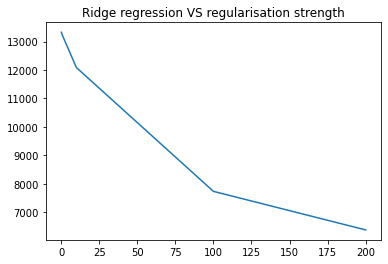

In [42]:
sns.lineplot(x=alphas, y=ridge_norm)
plt.title("Ridge regression VS regularisation strength")

Text(0.5, 1.0, 'Lasso regression VS regularisation strength')

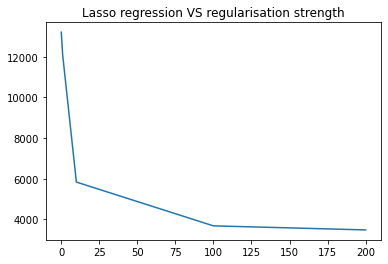

In [43]:
sns.lineplot(x=alphas, y=lasso_norm)
plt.title("Lasso regression VS regularisation strength")

- Lasso-регуляризация гораздо эффективнее уменьшает веса. Согласно графику основное уменьшение евклидовой нормы весов происходило при наименьших значениях коффициента регуляризации. Вероятно, начиная с alpha=100, больше не остаётся весов, которые можно уменьшить и занулить.

- Ridge регуляризация действует более плавно. В частности, при *alpha*=1000 она достигает результата нормы вектора весов, =4000, который был достигнут Lasso-регуляризацией при *alpha*=200.

- Lasso-regularization используют для отбора признаков, так как она позволяет занулять веса. Однако это лишь уменьшает веса (при *alpha*=200 единственный коэффициент отличен от нуля), а значение среднеквадратичной ошибки MSE значительно увеличивается.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [144]:
from sklearn.linear_model import LassoCV

In [145]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]+list(range(50, 1000, 50))+list(range(1000, 10000, 500))
lasso_cv = LassoCV(n_alphas=len(alphas), alphas=alphas, cv=5)
lasso_cv.alphas_ = alphas

lasso_cv.fit(X_train_scaled, y_train)
lasso_cv_result = lasso_cv.predict(X_train_scaled)

mse_path_mean = np.mean(lasso_cv.mse_path_, axis=1)
mse_path_mean

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1177271838.4319649, tolerance: 48309472.87280812
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2744224736.3830185, tolerance: 48309472.87280812
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3251409962.6037674, tolerance: 48309472.87280812
  model = cd_fast.enet_coordinate_descent_gram(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526:

array([15912620.01086018, 15912620.01086018, 15912620.01086018,
       15912620.01086018, 15912620.01086018, 15912620.01086018,
       15912620.01086018, 15912620.01086018, 15912620.01086018,
       15912620.01086018, 15912620.01086018, 15912620.01086018,
       14660950.27845296, 11410285.00367272,  8659754.15782077,
        6409357.74089711,  4659095.75290172,  3408968.19383462,
        3311462.83151897,  3218958.8134926 ,  3131456.13975551,
        3048954.8103077 ,  2971454.82514918,  2898956.18427993,
        2831458.88769998,  2768962.9354093 ,  2711468.32740791,
        2658975.06369581,  2611483.14427298,  2568992.56913943,
        2531503.33829518,  2499015.45174019,  2471528.9094745 ,
        2449043.71149809,  2400648.62476281,  2240373.80268444,
        1937945.3354311 ,  1517679.08526911,  1292173.07860587,
        1293501.15220355,  1295672.22576319,  1295949.34929573,
        1295978.54152969,  1295981.50175376])

In [146]:
lasso_cv.alphas_

array([9.5e+03, 9.0e+03, 8.5e+03, 8.0e+03, 7.5e+03, 7.0e+03, 6.5e+03,
       6.0e+03, 5.5e+03, 5.0e+03, 4.5e+03, 4.0e+03, 3.5e+03, 3.0e+03,
       2.5e+03, 2.0e+03, 1.5e+03, 1.0e+03, 9.5e+02, 9.0e+02, 8.5e+02,
       8.0e+02, 7.5e+02, 7.0e+02, 6.5e+02, 6.0e+02, 5.5e+02, 5.0e+02,
       4.5e+02, 4.0e+02, 3.5e+02, 3.0e+02, 2.5e+02, 2.0e+02, 1.5e+02,
       1.0e+02, 5.0e+01, 1.0e+01, 1.0e+00, 1.0e-01, 1.0e-02, 1.0e-03,
       1.0e-04, 1.0e-05])

In [147]:
best_alpha = lasso_cv.alphas_[np.argmin(mse_path_mean)]
print(best_alpha ,"- наболее подходящий коэффициент регуляризации, при котором MSE минимальна.")

1.0 - наболее подходящий коэффициент регуляризации, при котором MSE минимальна.


- Не нашёл противоречий в коде, но MSE не изменяется, если тренировать на масштабированной и немасштабированной выборке...
- alpha=1 случайно, или к этому есть предпосылки?
    
- Можно ли сказать, что при первых наибольших значениях alpha не играет никакой роли, т.к. модель крайне близка к константной?
    

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [148]:
X_train_scaled.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
16259,0.445813,0.170523,-0.201734,0.630510,0.540663,0.605461,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
24005,1.562356,0.588814,-0.649638,1.503049,1.397771,1.519486,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
12211,0.740749,0.937389,2.485693,0.799676,0.687843,0.858576,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
37918,-0.818197,-0.805489,-0.201734,-0.838559,-0.775299,-0.871040,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
181,-0.544328,-0.178053,-0.201734,-0.437904,-0.411678,-0.435121,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [199]:
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train_scaled, y_train)

print("Linear regression(X_train_scaled):", rates["LR.Train"])
mean_squared_error(y_train, lasso.predict(X_train_scaled))

Linear regression(X_train_scaled): 1284661.862119126


1289142.834736637

    Почему результат даже хуже, чем при обычной линейной регрессии, хотя мы могли бы выбрать alpha=0.0001, например? 
    Является ли это следствием усреднения при валидации?

In [203]:
for el in zip(X_train_scaled.columns, lasso.coef_):
    print(el)

('carat', 5219.223470039685)
('depth', -103.13762135298843)
('table', -72.11474229522292)
('x', -1009.839687653768)
('y', -0.0)
('z', -38.5131589342741)
('cut_Good', 437.82050935237254)
('cut_Ideal', 694.9102722215416)
('cut_Premium', 619.8842751248002)
('cut_Very Good', 601.6004718446184)
('color_E', -127.15409692123436)
('color_F', -183.44785076828808)
('color_G', -392.8279934931735)
('color_H', -885.2192091727286)
('color_I', -1360.4395504728234)
('color_J', -2263.2030689005815)
('clarity_IF', 4792.951485229573)
('clarity_SI1', 3171.1391003520607)
('clarity_SI2', 2206.8162006956236)
('clarity_VS1', 4082.0771995429354)
('clarity_VS2', 3770.0733029947414)
('clarity_VVS1', 4500.32277912932)
('clarity_VVS2', 4440.810599187433)


- `carat` имеет наибольший вес, зависимость прямая.
- `clarity` имеет следующие по величине значения. Чем выше clarity, тем большее значение она принимает в росте цены.
- `cut` имеет схожее влияние и закономерности.
- `color` же наоборот имеет обратное влияние на цену. При это чем хуже цвет (согласно описанию, тем больше он отрицательно влияет на стоимость бриллианта)
- `x`, `y` и `z` имеют различное значении в ценообразовании. Вероятно, так происходит из-за зависимости данных величин. Очевидно, что бриллианты относительно пропорциональны по своим размерам, поэтому между длиной, шириной и глубиной бриллианта может прослеживаться зависимость, которую нужно ликвидировать. 

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [213]:
mean_squared_error(y_test, lasso.predict(X_test_scaled))

1266198.458052361

In [218]:
print("lr.intercept_:", lr.intercept_, "\nlasso.intercept_:", lasso.intercept_)

lr.intercept_: -193.70823587161476 
lasso.intercept_: 350.64408824803513


In [201]:
print("Linear regression(X_test_scaled):", rates["LR.Test"])

Linear regression(X_test_scaled): 1259159.1137946637


Получается, что для предсказаний лучше использовать обычную Linear regression. Хотя у нас и получилось снизить риск переобучения модели (что показывает наличие уменьшившихся весов и более адекватный intercept), модель делает более неудачные предсказания, чем делала при обычной линейной регрессии. 